# Iris data classification using K-means clustering

In this program we will load a dataset named iris which has some features of the flowers and in what category do these flowers lie.
We will calculate the centroid points by taking mean of all the data points..
The data points which are closest to the respective centroids will be clustered around that centroid.
Hence classification is performed.
                        

### STEP 1 : Importing the required modules

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets

### STEP 2 : importing the data set

In [5]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
# converting the data into dataframe
df = pd.DataFrame({'x': iris.data[:,0] , 'y': iris.data[:,1] , 'clusters': iris.target })
df

,x,y,clusters
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


### STEP 3: Plotting the Data

Text(0, 0.5, 'Sepal Width')

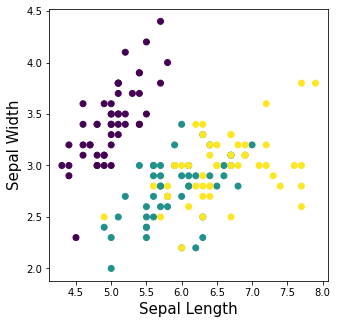

In [22]:
figure = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'], c = iris.target) # c is used color the point at x,y for each target value(0,1,2)
plt.xlabel('Sepal Length', fontsize = 15)
plt.ylabel('Sepal Width', fontsize= 15)

### STEP 4: Choosing the centroids (3 centroids)

In [14]:
centroids = {}
for i in range (3):
    cluster_list = []
    cluster_list.append(df.loc[df['clusters']==i]['x'].mean())
    cluster_list.append(df.loc[df['clusters']==i]['y'].mean())
    centroids[i] = cluster_list
centroids    

{0: [5.006, 3.428],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.974]}

### STEP 5 : Plotting the Centroids

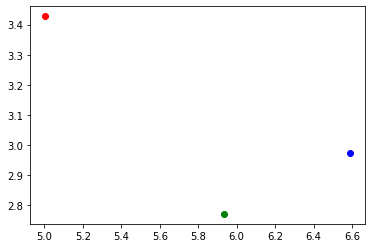

In [30]:
centroid_color = { 0 : 'r' ,  1 : 'g' , 2 : 'b'}
for i in range(3):
    plt.scatter(centroids[i][0],centroids[i][1], color = centroid_color[i] )
    

### STEP 6 :Plotting centroids along with other data points

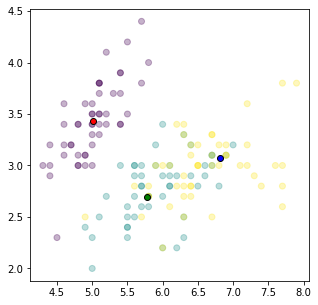

In [103]:
figure = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'], c = iris.target,alpha = 0.3) # alpha is used to highlit the centroids with respect to the other points.
centroid_color = { 0 : 'r' ,  1 : 'g' , 2 : 'b'}
for i in range(3):
    plt.scatter(centroids[i][0],centroids[i][1], color = centroid_color[i] ,edgecolor = 'k')
plt.show()    
    


### STEP 7 : Calculating the distance of the points from the centroids and updating the data frames

In [106]:
def centroid_cal(df, centroids):
    for i in range(3):
        # sqrt((x1 - x2)^2 + (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt((df['x'] - centroids[i][0]) ** 2 + (df['y'] - centroids[i][1]) ** 2))
        
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1) #create a column to show which data points are closest to which target
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: centroid_color[x])
    return df

In [107]:
df = centroid_cal(df,centroids)
df

,x,y,clusters,distance from0,distance from1,distance from2,distance_from_0,distance_from_1,distance_from_2,closest,color
0,5.1,3.5,0,0.099184,NaN,NaN,0.118406,1.051594,1.764836,0,r
1,4.9,3.0,0,NaN,NaN,NaN,0.440931,0.926140,1.914215,0,r
2,4.7,3.2,0,NaN,NaN,NaN,0.381602,1.187514,2.116492,0,r
3,4.6,3.1,0,NaN,NaN,NaN,0.521939,1.242335,2.212913,0,r
4,5.0,3.6,0,NaN,NaN,NaN,0.172105,1.192508,1.887407,0,r
...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,2,1.877184,0.8169,0.112676,1.747232,0.976130,0.135136,2,b
146,6.3,2.5,2,2.155184,0.4369,NaN,1.592363,0.560492,0.770028,1,g
147,6.5,3.0,2,1.677184,0.6169,NaN,1.554098,0.788837,0.321509,2,b
148,6.2,3.4,2,1.194784,0.6609,NaN,1.194328,0.826107,0.693868,2,b


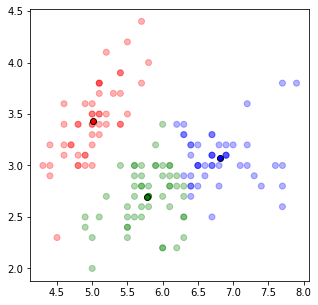

In [98]:
#plot the result
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=centroid_color[i], edgecolor='k')

plt.show()

### STEP 8 : Updating the centroids again

In [86]:
def update(cp):
    for i in range(3):
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return cp

In [89]:
centroids = update(centroids)
centroids

{0: [5.009433962264151, 3.3830188679245285],
 1: [5.806122448979591, 2.693877551020408],
 2: [6.802083333333333, 3.06875]}

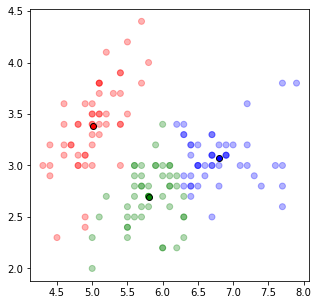

In [90]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=centroid_color[i], edgecolor='k')

plt.show()

### Reassigning the points to clusters

In [91]:
df = centroid_cal(df, centroids)

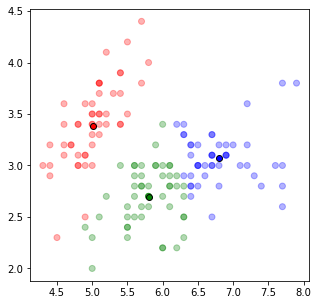

In [92]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=centroid_color[i], edgecolor='k')
plt.show()

### STEP 9 : Updating all clusters untill the clusters don't change

In [93]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

## Visualising the Final Result:

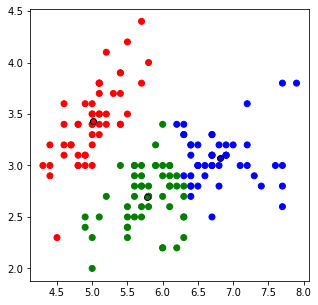

In [95]:

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'])
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=centroid_color[i], edgecolor='k')

plt.show()